<a href="https://colab.research.google.com/github/myan105/MachineLearning/blob/main/Decision_Trees_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Trees and Overfitting**


Objective:
* To understand the basics of decision trees and Hunt's algorithm.
* To practice building decision trees using sample datasets.
* To visualize model performance and apply pre-pruning and post-pruning techniques to tackle overfitting issues.

In [3]:
# Import the neccesary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Creating a Dataset:
Two class problem:

1400 instances of blue class
* 1000 instances generated from a Gaussian centered at (10,10)
* 400 noisy instances added

1400 instances of green class
* Generated from a uniform distribution in (0,20) coordinates

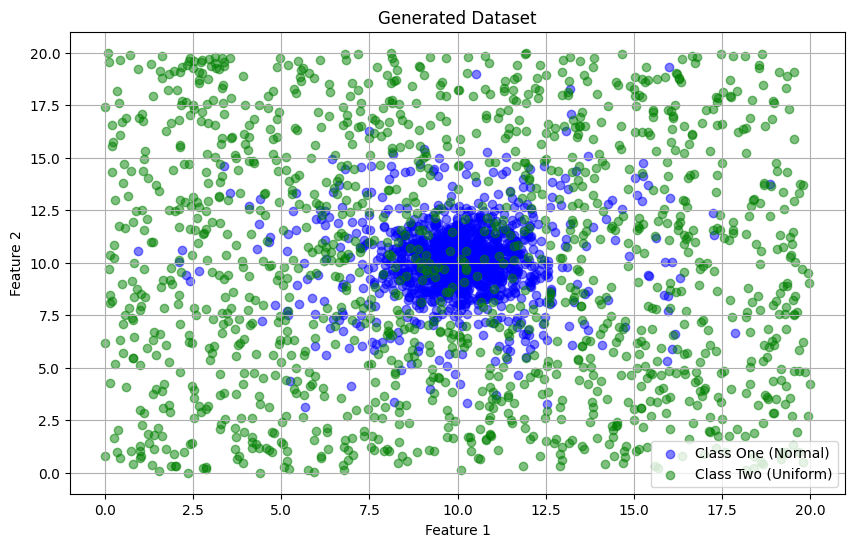

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate instances for class one using normal distribution
class_one_mean = (10, 10)  # Center around (10, 10)
class_one_std = 1
class_one_instances = 1000 #Generate 1000 points centered around (10,10) with a std deviation of 1
class_one = np.random.normal(loc=class_one_mean, scale=class_one_std, size=(class_one_instances, 2))

# Generate noisy instances for class one
noisy_instances = 400
class_one_noisy = np.random.normal(loc=(0, 0), scale=3, size=(noisy_instances, 2)) #400 noisy points around (0,0) with a std deviation of 3

# Generate instances for class two using uniform distribution in a [0,20] range]
class_two_instances = 1400
class_two = np.random.uniform(low=0, high=20, size=(class_two_instances, 2))

# Concatenate class one instances and noisy instances (combining class one and noisy points)
X_class_one = np.vstack((class_one, class_one_noisy + class_one_mean))  # Adjusting mean to add noise (stask the normal and noisy instances together)
y_class_one = np.zeros(X_class_one.shape[0])  # Label for class one is 0 )assign label 0 to all class one points)

# Labels for class two are 1 (combining class two)
X_class_two = class_two #class two points remain the same
y_class_two = np.ones(class_two.shape[0]) #assign label 1 to all class two points

# Concatenate features and labels for both classes #merging both classes into a single dataset
X = np.vstack((X_class_one, X_class_two))
y = np.concatenate((y_class_one, y_class_two))


# Visualize the data
plt.figure(figsize=(10, 6))

# Plot instances for class one (blue), follows a normal distribution around (10,10)
plt.scatter(X_class_one[:, 0], X_class_one[:, 1], color='blue', label='Class One (Normal)', alpha=0.5)

# Plot instances for class two (green), is uniformly spread in the [0,20] range
plt.scatter(X_class_two[:, 0], X_class_two[:, 1], color='green', label='Class Two (Uniform)', alpha=0.5)

plt.title('Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


The default values for the DecisionTreeClassifier in scikit-learn are as follows:

**criterion:** The function to measure the quality of a split. By default, it is set to 'gini', which measures the impurity of the split based on the Gini impurity criterion. Alternatively, you can set it to 'entropy' to use information gain.

**splitter:** The strategy used to choose the split at each node. By default, it is set to 'best', which chooses the best split. Alternatively, you can set it to 'random' to choose the best random split.

**max_depth:** The maximum depth of the tree. By default, it is set to 'None', meaning nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split:** The minimum number of samples required to split an internal node. By default, it is set to 2, meaning nodes with fewer than 2 samples are not split further.

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. By default, it is set to 1, meaning nodes will continue to be split until each leaf node contains 1 sample.

**max_features:** The number of features to consider when looking for the best split. By default, it is set to 'None', meaning all features are considered.
random_state: The seed of the random number generator. By default, it is set to 'None'.

**max_leaf_nodes:** The maximum number of leaf nodes in the tree. By default, it is set to 'None', meaning unlimited number of leaf nodes.

**min_impurity_decrease:** A node will be split if this split induces a decrease of the impurity greater than or equal to this value. By default, it is set to 0.0.

**ccp_alpha:** Complexity parameter used for Minimal Cost-Complexity Pruning. By default, it is set to 0.0.

These are the primary parameters, but there are others as well, and you can refer to the scikit-learn documentation for more details.

**Coding Exersice:** Train a decisoin tree with default parameters from DecisionTreeClassifier in sklearn library. Show the accuracy results for both training and test sets.

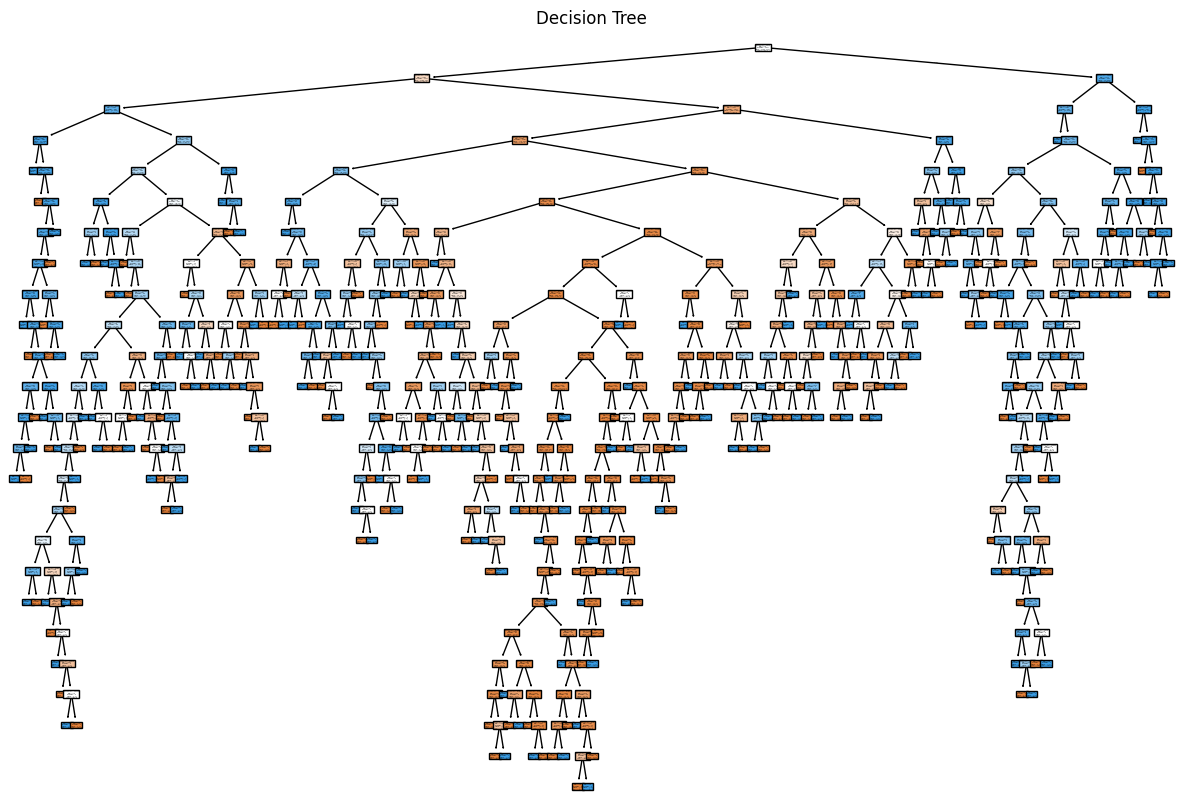

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets with 20% test and 80% training


df = pd.DataFrame(X, columns =['Feature 1', 'Feature 2'])
df['Label'] = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#print("Training set shape:", X_train.shape, y_train.shape)
#print("Testing set shape", X_test.shape, y_test.shape)


# Train a decision tree classifier with default parameters
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the classifier on the testing set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)



# Visualize the learned tree
""" use plot_tree from sklearn.tree """
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree")
plt.show()




**Coding Exersice:** Perform sensitivity analysis over over $\textit{'max_depth'} $ hyperparameter for both training and test errors in the same figure. You need to calculate the errors for both sets.

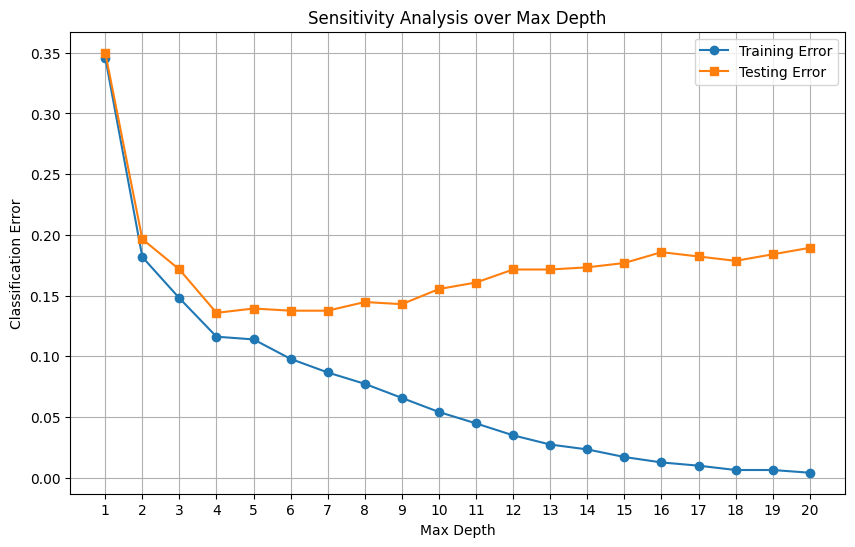

In [6]:
# Define the range of max_depth values to test
max_depth_values = range(1, 21)  # Test max_depth from 1 to 20

# Initialize lists to store training and test errors
training_errors = []
test_errors = []

# Split the dataset into training and testing sets with 20% test and 80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


# Iterate over each max_depth value

for max_depth in max_depth_values:
    # Train a decision tree classifier with the current max_depth value
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state =42)
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the training set
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    training_errors.append(1- train_accuracy)

    # Evaluate the classifier on the test set
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_errors.append(1-test_accuracy)


# Plot the sensitivity analysis results

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, training_errors, marker='o', label='Training Error')
plt.plot(max_depth_values, test_errors, marker='s', label='Testing Error')
plt.title('Sensitivity Analysis over Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Classification Error')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()



**Coding Exersice:** Re-train the decision tree with $\textit{'max_depth'} $ of 20. Show the accuracy results for both training and test sets.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets with 20% test and 80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
training_errors = []
test_errors = []

# Train a decision tree classifier with a maximum depth of 20
clf = DecisionTreeClassifier(max_depth=20, random_state=42)
clf.fit(X_train, y_train)


# Evaluate the classifier on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
training_errors.append(1- train_accuracy)


# Evaluate the classifier on the testing set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_errors.append(1-test_accuracy)
# Print accuracy results
print("Training Accuracy (max_depth=20):", train_accuracy)
print("Testing Accuracy (max_depth=20):", test_accuracy)


Training Accuracy (max_depth=20): 0.9959821428571428
Testing Accuracy (max_depth=20): 0.8107142857142857




**Observation** There is a noticeable gap between the training and test accuracies.

Training Accuracy is very high (close to 100%), meaning the decision tree has perfectly memorized the training data.
Testing Accuracy is lower (around 80-85%), showing that the model does not generalize well to unseen data.

**Coding Exersice:** Re-train the decision tree with $\textit{'max_depth'} $ of 4. Show the accuracy results for both training and test sets.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets with 20% test and 80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


# Train a decision tree classifier with a maximum depth of 4
training_errors = []
test_errors = []
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


# Evaluate the classifier on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
training_errors.append(1-train_accuracy)


# Evaluate the classifier on the testing set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_errors.append(1-test_accuracy)
# Print accuracy results
print("Training Accuracy (max_depth=20):", train_accuracy)
print("Testing Accuracy (max_depth=20):", test_accuracy)


Training Accuracy (max_depth=20): 0.8839285714285714
Testing Accuracy (max_depth=20): 0.8642857142857143




**Observation:** The gap between training and testing accuracy is about 2%, which means it is smaller now-> better accuracy.
This is because when we reduce max_depth to 4, the tree stops splitting after 4 levels and is forced to generalize rather than memorize, avoiding overfittng.

**Post-Pruning:** To apply post-pruning to the decision tree with 'max_depth' of 20, you can use the ccp_alpha parameter, which stands for Complexity Cost Pruning. This parameter controls the threshold for pruning. As the threshold increases, more nodes are pruned, leading to a simpler tree.



In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets with 20% test and 80% training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


# Train a decision tree classifier with a maximum size of 20
""" You can use the same code as before. You have already trained this model."""
tree_clf = DecisionTreeClassifier(max_depth=20, random_state=42)
tree_clf.fit(X_train, y_train)


# Apply post-pruning with different ccp_alpha values
""" use tree_clf.cost_complexity_pruning_path , then capture ccp_alphas """
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate over different ccp_alpha values and retrain the decision tree and print out the accuracy of the retrained model
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(max_depth=20, random_state=42, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train, y_train)
    y_pred_pruned = pruned_tree.predict(X_test)
    accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
    accuracy_scores.append(accuracy_pruned)
    print(f"Accuracy for ccp_alpha={ccp_alpha}: {accuracy_pruned}")


Accuracy for ccp_alpha=0.0: 0.8107142857142857
Accuracy for ccp_alpha=8.596892030175414e-05: 0.8107142857142857
Accuracy for ccp_alpha=0.00018601190476190486: 0.8107142857142857
Accuracy for ccp_alpha=0.0002976190476190476: 0.8107142857142857
Accuracy for ccp_alpha=0.0002976190476190476: 0.8107142857142857
Accuracy for ccp_alpha=0.0002976190476190476: 0.8107142857142857
Accuracy for ccp_alpha=0.00029761904761904765: 0.8107142857142857
Accuracy for ccp_alpha=0.00032366071428571415: 0.8107142857142857
Accuracy for ccp_alpha=0.0003348214285714286: 0.8107142857142857
Accuracy for ccp_alpha=0.0003348214285714286: 0.8107142857142857
Accuracy for ccp_alpha=0.0003571428571428571: 0.8107142857142857
Accuracy for ccp_alpha=0.0003571428571428571: 0.8107142857142857
Accuracy for ccp_alpha=0.0003571428571428571: 0.8107142857142857
Accuracy for ccp_alpha=0.00035714285714285714: 0.8107142857142857
Accuracy for ccp_alpha=0.00037202380952380956: 0.8125
Accuracy for ccp_alpha=0.00037202380952380956: 0.8



**Observation:** As ccp_alpha increases, the decision tree becomes simpler. Initially, accuracy remains stable (about 81.07%). A slight improvement (about 86%) is observed around ccp_alpha = 0.0012. After ccp_alpha > 0.00237, accuracy declines due to over-pruning. For very large ccp_alpha values (>0.045), accuracy drops drastically (48%), showing the model is too simple.

The highest accuracy observed in was ~87.14%.

The accuracy of the pruned model (max_depth=20 + pruning) is similar to a tree with max_depth=4. This happens because pruning removes overfitting branches, making the tree simpler yet effective.